# Non linear filtering
Goal: introduce non-linear filters and work on a segmentation problem

In [1]:
# Uncomment this if scikit-image is not available
#!pip install scikit-image

# Clone the repository. Uncomment this line if it you want to get a local copy of the repository.
# !git clone https://gricad-gitlab.univ-grenoble-alpes.fr/dallamum/IIP.git

# Pull updates from the git repository. Uncomment this line if you already have cloned the repository and you want to update it. In this case, this file should belong to the repository.
# !git pull https://gricad-gitlab.univ-grenoble-alpes.fr/dallamum/IIP.git

## Setup

In [34]:
# Load libraries
import imageio
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as ft

from skimage import io, data, img_as_float
from skimage import exposure
from skimage import color as col
from skimage.exposure import rescale_intensity
from skimage import filters
from skimage.filters import gaussian
# structuring elements
from skimage.morphology import (square, rectangle, diamond, disk, octagon, star)
# import morphological operators
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, black_tophat, reconstruction

# median filter
from skimage.filters import median

from skimage.draw import disk

from scipy import ndimage
from scipy.ndimage import convolve as conv
from scipy.ndimage import correlate as corr



In [24]:
# Utility funtions 

# show an image with grayscale colormap
def imshow(f):
    plt.figure()
    plt.imshow(f, cmap='gray')
    
# compare two images
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

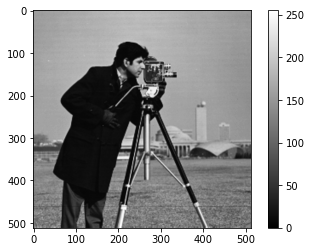

In [25]:
# Load an image
f = data.camera()
plt.imshow(f, cmap='gray')
plt.colorbar()
plt.show()

## Image with salt&pepper noise

In [26]:
from skimage.filters.rank import median
from skimage.morphology import disk

<function matplotlib.pyplot.show(close=None, block=None)>

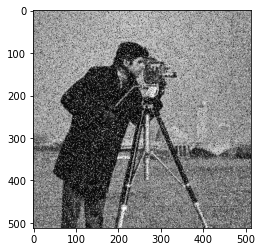

In [27]:
# Add salt and pepper noise
noise_level = 10 # percent

noise_level = noise_level/100
noise = np.random.random(f.shape)
f_n = np.copy(f)
f_n[noise > 1-noise_level] = 255
f_n[noise < noise_level] = 0

plt.figure
plt.imshow(f_n, cmap='gray')
plt.show

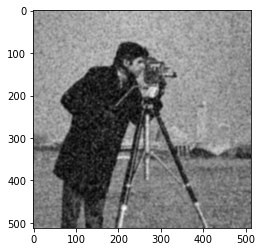

In [29]:
# Linear filter
k = disk(3)

k = k/k.sum()
g_avg = conv(f_n, k)

plt.figure
plt.imshow(g_avg, cmap='gray')
plt.show()

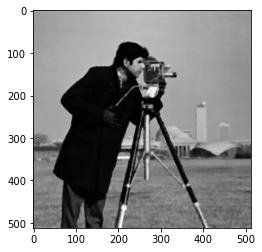

In [30]:
# Median filter
g_med = median(f_n, disk(3))

plt.figure
plt.imshow(g_med, cmap='gray')
plt.show()

## Mathematical morphology

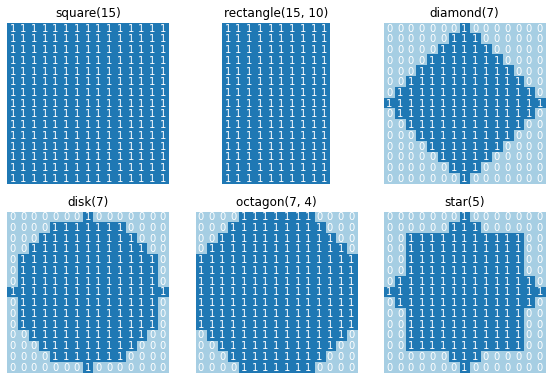

In [31]:
from skimage.morphology import (square, rectangle, diamond, disk, octagon, star)

# Structuring elements
# define structuring elements with different shapes

# Generate 2D structuring elements.
struc_2d = {
    "square(15)": square(15),
    "rectangle(15, 10)": rectangle(15, 10),
    "diamond(7)": diamond(7),
    "disk(7)": disk(7),
    "octagon(7, 4)": octagon(7, 4),
    "star(5)": star(5)
}

# Visualize the elements.
fig = plt.figure(figsize=(8, 8))

idx = 1
for title, struc in struc_2d.items():
    ax = fig.add_subplot(3, 3, idx)
    ax.imshow(struc, cmap="Paired", vmin=0, vmax=12)
    for i in range(struc.shape[0]):
        for j in range(struc.shape[1]):
            ax.text(j, i, struc[i, j], ha="center", va="center", color="w")
    ax.set_axis_off()
    ax.set_title(title)
    idx += 1

fig.tight_layout()
plt.show()

## Morphological operators
Some basic operators are listed below. $B$ is a structuring element and $\overline{B}$ is the reflected SE (i.e., rotation of $B$ of 180 degrees around its origin). Load the cameraman image. Apply each operator to the image and see the effects.
- Erosion $\epsilon_B(f)$ with `erosion`.
- Dilation $\delta_B(f)$  with `dilation`.
- Opening $\gamma_B (f)=\delta_{\overline{B}}~[\epsilon_B(f)]$ with `opening`.
- Closing $\phi_B (f)=\epsilon_{\overline{B}}~[\delta_B(f)]$ with `closing`.
- White Top Hat (Residues of an opening)  $WTH(f)=f - \gamma_B(f)$, `white_tophat`.
- Black Top Hat (Residues of a closing)  $BTH(f)=\phi_B( f ) - f$, `black_tophat` .

Analyze the results also by looking at how a profile is affected by the processing.


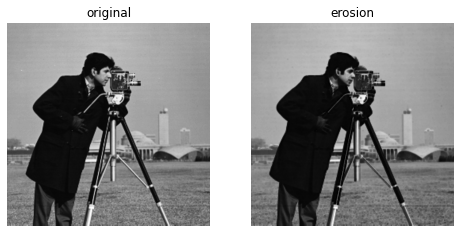

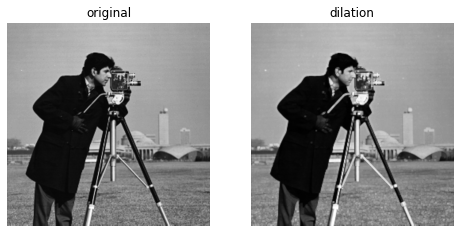

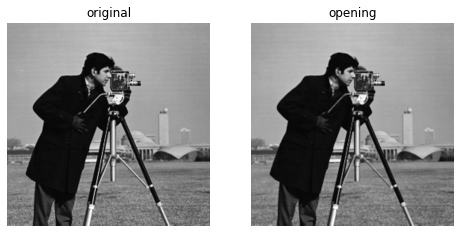

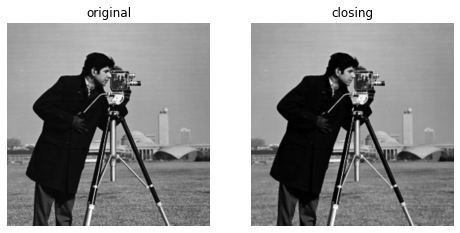

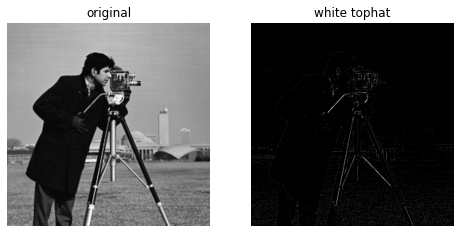

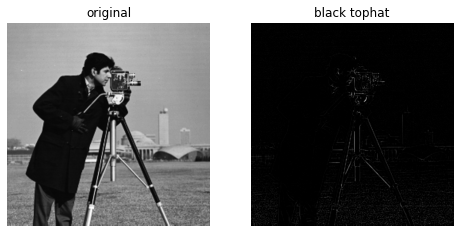

In [32]:
# define a SE
SE = square(3)

f_ero = erosion(f, SE)
plot_comparison(f, f_ero, 'erosion')

f_dil = dilation(f, SE)
plot_comparison(f, f_dil, 'dilation')

f_open = opening(f, SE)
plot_comparison(f, f_open, 'opening')

f_close = closing(f, SE)
plot_comparison(f, f_close, 'closing')

f_wth = white_tophat(f, SE)
plot_comparison(f, f_wth, 'white tophat')

f_bth = black_tophat(f, SE)
plot_comparison(f, f_bth, 'black tophat')

## Test
Change the shape and size of the structuring element and see the effects on the image. Focus in particular on bright and dark regions.

## Automatically extract the rice grains

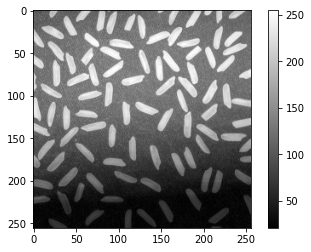

In [40]:
f = io.imread('images/rice_bkg_mult.png')

plt.figure
plt.imshow(f, cmap='gray')
plt.colorbar()
plt.show()

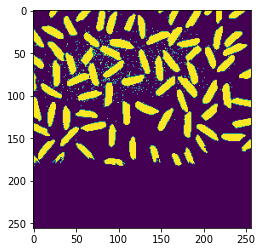

In [42]:
# EXample of binary map obtained by thresholding
plt.imshow(f>150)